In [ ]:
# https://ppiazi.tistory.com/entry/python-cyclomatic-complexity-%EB%AA%A8%EB%93%88-lizard

In [ ]:
# https://github.com/terryyin/lizard

In [ ]:
# pip install cognitive_complexity

In [1]:
import sys, os
p = os.path.abspath('..')
pp = os.path.abspath('../..')
sys.path.insert(1, p)
sys.path.insert(1, pp)

In [2]:
#customized preprocessing pkg
import preprocess as pp
import pandas as pd
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
# https://joaorafaelm.github.io/notebook/python/2021/04/10/cognitive-complexity.html
import config.config as conf

In [ ]:
input_year = '2022'

In [4]:
input_pl = 'java'

In [5]:
print(conf.DATA_PATH)

/usr/share/d_ollama


### 소스코드 complexity 계산

In [6]:
# 파일 불러오기
with open(f'{conf.DATA_PATH}/data/complexity_{input_pl}_df_{input_year}.pkl', 'rb') as f:
    complexity_java_df = pickle.load(f)

In [7]:
complexity_java_df['cdate'].max()

'2021-12-31'

In [8]:
complexity_java_df['cdate'].max()

'2021-12-31'

In [9]:
htmlp = pp.HTMLParser()
codep = pp.CodeSectionParser()

In [10]:
complexity_java_df['c_h_body'] = complexity_java_df['body'].apply(lambda x : htmlp.clean_html_str(x))

In [11]:
complexity_java_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87544 entries, 0 to 87543
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        87544 non-null  int64 
 1   cdate     87544 non-null  object
 2   title     87544 non-null  object
 3   body      87544 non-null  object
 4   c_h_body  87544 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.3+ MB


In [12]:
complexity_java_df['c_body'] = complexity_java_df['body'].apply(lambda x : codep(x))

In [13]:
complexity_java_df

,id,cdate,title,body,c_h_body,c_body
0,70542827,2021-12-31,Can't make Admob App Open Ads to appear on app...,<p>I'm trying to implement Admob App Open Ads ...,I'm trying to implement Admob App Open Ads and...,"{'code_sections': [{'off_beg': 443, 'off_end':..."
1,70542869,2021-12-31,I cannot connect to the websocket using Postman,<p>I am trying to create a simple chat applica...,I am trying to create a simple chat applicatio...,"{'code_sections': [{'off_beg': 263, 'off_end':..."
2,70542979,2021-12-31,Android convert charset,<p>How can I convert this &quot;Predajnďż˝&quo...,"How can I convert this "";Predajnďż˝""; (Windows...",{'code_sections': []}
3,70543231,2021-12-31,Spring cloud stream RabbitMQ - bind DLQ with a...,<p>I am using Spring Cloud Stream version <cod...,I am using Spring Cloud Stream version 3.0.6.R...,"{'code_sections': [{'off_beg': 728, 'off_end':..."
4,70543275,2021-12-31,Execution failed for task ':app:checkDebugDupl...,<h2>Task failed with an exception.</h2>\n<ul>\...,Task failed with an exception.\n\nWhat went wr...,{'code_sections': []}
...,...,...,...,...,...,...
87539,68096438,2021-06-23,Java 8 LocalDate returns different date than i...,<p>If the date in the database row is at least...,If the date in the database row is at least a ...,{'code_sections': []}
87540,68096444,2021-06-23,Mapstruct Mapper with @ConfigProperty in JEE,<p>Hello good people of StackOverflow :)</p>\n...,Hello good people of StackOverflow :)\nI have ...,"{'code_sections': [{'off_beg': 428, 'off_end':..."
87541,68096486,2021-06-23,SQL Server query no longer slow after query ch...,<p>I have the following query :</p>\n<pre><cod...,"I have the following query :\nSELECT\n A.id,\...","{'code_sections': [{'off_beg': 47, 'off_end': ..."
87542,68096541,2021-06-23,How to call this retrofit method every hour?,<p>How do I call this method every hour since ...,How do I call this method every hour since I a...,"{'code_sections': [{'off_beg': 459, 'off_end':..."


In [14]:
complexity_java_src = complexity_java_df[['id', 'c_body']]

In [15]:
complexity_java_src['code_len'] = complexity_java_src['c_body'].apply(lambda x: len(x['code_sections']))

/tmp/ipykernel_739618/804880781.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  complexity_java_src['code_len'] = complexity_java_src['c_body'].apply(lambda x: len(x['code_sections']))


In [16]:
complexity_java_src = complexity_java_src[complexity_java_src['code_len']>0]

In [17]:
complexity_java_src.head(5)

,id,c_body,code_len
0,70542827,"{'code_sections': [{'off_beg': 443, 'off_end':...",2
1,70542869,"{'code_sections': [{'off_beg': 263, 'off_end':...",5
3,70543231,"{'code_sections': [{'off_beg': 728, 'off_end':...",2
5,70543352,"{'code_sections': [{'off_beg': 189, 'off_end':...",2
6,70543706,"{'code_sections': [{'off_beg': 72, 'off_end': ...",4


In [18]:
src_df = pd.DataFrame(columns = ['id', 'src'])
def code_explode(row) : 
    global src_df
    src_arr = []
    for i in range(row['code_len']):
        new_rows = pd.DataFrame({'id': [row['id']], 'src': [row['c_body']['code_sections'][i]['span_str']]})
        src_df = pd.concat([src_df, new_rows], axis=0)

    return True
        

In [19]:
# bert_src_ex = bert_src[['q_id', 'q_prep_text']].apply(pd.Series.explode)
complexity_java_src.apply(code_explode, axis = 1)

0        True
1        True
3        True
5        True
6        True
         ... 
87538    True
87540    True
87541    True
87542    True
87543    True
Length: 64231, dtype: bool

In [20]:
src_df.head()

,id,src
0,70542827,public class MyApplication extends Application...
0,70542827,/**\n * Prefetches App Open Ads.\n */\npublic ...
0,70542869,@Configuration\n@EnableWebSocketMessageBroker\...
0,70542869,@Controller\npublic class WebSocketController ...
0,70542869,@Builder\n@Getter\npublic class Message {\n ...


In [23]:
src_df.reset_index(drop=True, inplace=True)

In [24]:
src_df.reset_index(inplace=True)

In [25]:
src_df.head()

,index,id,src
0,0,70542827,public class MyApplication extends Application...
1,1,70542827,/**\n * Prefetches App Open Ads.\n */\npublic ...
2,2,70542869,@Configuration\n@EnableWebSocketMessageBroker\...
3,3,70542869,@Controller\npublic class WebSocketController ...
4,4,70542869,@Builder\n@Getter\npublic class Message {\n ...


In [ ]:
for i in range(src_df.shape[0]):
    idx = src_df.iloc[i, 0]
    qid = src_df.iloc[i, 1]
    src = src_df.iloc[i, 2]
    file_nm = str(idx)+'_' + str(qid)+'.java'
    with open(f'{conf.DATA_PATH}/data/src/{input_year}_{input_pl}_src/{file_nm}', 'wb') as f:
        f.write(src.encode())


In [ ]:
# https://github.com/rohaquinlop/complexipy

In [ ]:
# pip install complexipy

In [ ]:
# !complexipy /home/mghan/sopjt/git/data/src/3_74963438.py -l file -o

In [ ]:
# cyclomatic은 모든 언어 가능 but cognitive는 언어별로 따로 분석해야함
# 하려면 소나큐브 사야 함 
# pyhon 기준으로는 조금 삽질하면 할 수 있을 듯.... 해보고 유의미하면 소나큐브 고?


### complexity 결과 확인

In [28]:
path = f'{conf.DATA_PATH}/data/src/{input_year}_{input_pl}_excel/'
file_list = os.listdir(path)
file_list_csv = [file for file in file_list if file.endswith(".csv")]

# print ("file_list_csv: {}".format(file_list_csv))

In [44]:
calc_com_df = pd.DataFrame(columns = ['Absolute Module Path','Module Position',	'Module Declaration',	'Max nesting',	'Cognitive Complexity'])
for file_nm in file_list_csv :
    tmp = pd.read_csv(path+file_nm, sep=';')
    tmp['file_nm'] = file_nm
    calc_com_df = pd.concat([calc_com_df, tmp], axis = 0)

In [45]:
calc_com_df.head()

,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm
0,null.mid_term,5,void main(String[] args),3,3,101235_66843255.csv
0,com.example.dietmanagement.DayFragment,14,"View onCreateView(LayoutInflater inflater, Vie...",1,0,101559_66737974.csv
0,null.EmailService,22,"void send(String to, String email)",2,1,100457_66857518.csv
0,null.Main,4,void main(String[] args),2,1,101869_66726821.csv
0,null.Response,6,SuccessfulResponse getSuccessfullResponse(),1,0,100521_66852377.csv


In [46]:
# 전체 데이터셋 
with open(f'{conf.DATA_PATH}/data/calc_com_df_{input_year}_{input_pl}.pkl', 'wb') as f:
    pickle.dump(calc_com_df, f)

In [47]:
calc_com_df.head()

,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm
0,null.mid_term,5,void main(String[] args),3,3,101235_66843255.csv
0,com.example.dietmanagement.DayFragment,14,"View onCreateView(LayoutInflater inflater, Vie...",1,0,101559_66737974.csv
0,null.EmailService,22,"void send(String to, String email)",2,1,100457_66857518.csv
0,null.Main,4,void main(String[] args),2,1,101869_66726821.csv
0,null.Response,6,SuccessfulResponse getSuccessfullResponse(),1,0,100521_66852377.csv


In [48]:
calc_com_df.reset_index(drop=True, inplace=True)

In [49]:
calc_com_df.head()

,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm
0,null.mid_term,5,void main(String[] args),3,3,101235_66843255.csv
1,com.example.dietmanagement.DayFragment,14,"View onCreateView(LayoutInflater inflater, Vie...",1,0,101559_66737974.csv
2,null.EmailService,22,"void send(String to, String email)",2,1,100457_66857518.csv
3,null.Main,4,void main(String[] args),2,1,101869_66726821.csv
4,null.Response,6,SuccessfulResponse getSuccessfullResponse(),1,0,100521_66852377.csv


In [50]:
calc_com_df['index'] = calc_com_df['file_nm'].apply(lambda x : x.split('_')[0])
# calc_com_df['Path'].apply(lambda x : [  for i in x.split('_')])

In [51]:
calc_com_df['id'] = calc_com_df['file_nm'].apply(lambda x : x.split('_')[1].split('.')[0])

In [52]:
calc_com_df.sort_values(by = ['index', 'id'])

,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm,index,id
348,null.CloudConfig,13,AmazonSNS amazonSnsClient(),1,0,10000_70100862.csv,10000,70100862
349,null.CloudConfig,18,AWSCredentialsProvider aWSCredentials(),1,0,10000_70100862.csv,10000,70100862
268,null.PhoneNumbers,6,PhoneNumbers(),1,0,100021_66762875.csv,100021,66762875
269,null.PhoneNumbers,10,String toString(),1,0,100021_66762875.csv,100021,66762875
473,null.UserServlet,6,"void doPost(HttpServletRequest request, HttpSe...",1,0,100023_66762875.csv,100023,66762875
...,...,...,...,...,...,...,...,...
20,myProject.security.RegistrationController,18,RegistrationController(UserRepository theUserR...,1,0,102138_66722537.csv,102138,66722537
21,myProject.security.RegistrationController,23,String registrationForm(),1,0,102138_66722537.csv,102138,66722537
22,myProject.security.RegistrationController,28,String processRegistration(RegistrationForm th...,1,0,102138_66722537.csv,102138,66722537
453,myProject.security.UserRepositoryDetailsService,16,UserRepositoryUserDetailsService(UserRepositor...,1,0,102140_66722537.csv,102140,66722537


In [53]:
calc_com_df[['index', 'id', 'Cognitive Complexity']] = calc_com_df[['index', 'id', 'Cognitive Complexity']].astype('int')

In [54]:
src_df[['index', 'id']] = src_df[['index', 'id']].astype('int')

In [55]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Absolute Module Path  597 non-null    object
 1   Module Position       597 non-null    object
 2   Module Declaration    597 non-null    object
 3   Max nesting           597 non-null    object
 4   Cognitive Complexity  597 non-null    int64 
 5   file_nm               597 non-null    object
 6   index                 597 non-null    int64 
 7   id                    597 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 37.4+ KB


In [56]:
calc_com_df.sort_values(by = ['index', 'id'])

,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm,index,id
447,null.MatchingClient,10,void main(String[] args),4,3,1015_70279347.csv,1015,70279347
267,null.MatchingServer,10,void main(String[] args),4,6,1016_70279347.csv,1016,70279347
348,null.CloudConfig,13,AmazonSNS amazonSnsClient(),1,0,10000_70100862.csv,10000,70100862
349,null.CloudConfig,18,AWSCredentialsProvider aWSCredentials(),1,0,10000_70100862.csv,10000,70100862
59,null.Main,3,void main(String[] args),1,0,10033_69972279.csv,10033,69972279
...,...,...,...,...,...,...,...,...
20,myProject.security.RegistrationController,18,RegistrationController(UserRepository theUserR...,1,0,102138_66722537.csv,102138,66722537
21,myProject.security.RegistrationController,23,String registrationForm(),1,0,102138_66722537.csv,102138,66722537
22,myProject.security.RegistrationController,28,String processRegistration(RegistrationForm th...,1,0,102138_66722537.csv,102138,66722537
453,myProject.security.UserRepositoryDetailsService,16,UserRepositoryUserDetailsService(UserRepositor...,1,0,102140_66722537.csv,102140,66722537


In [57]:
calc_com_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Absolute Module Path  597 non-null    object
 1   Module Position       597 non-null    object
 2   Module Declaration    597 non-null    object
 3   Max nesting           597 non-null    object
 4   Cognitive Complexity  597 non-null    int64 
 5   file_nm               597 non-null    object
 6   index                 597 non-null    int64 
 7   id                    597 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 37.4+ KB


In [58]:
src_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139701 entries, 0 to 139700
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   index   139701 non-null  int64 
 1   id      139701 non-null  int64 
 2   src     139701 non-null  object
dtypes: int64(2), object(1)
memory usage: 3.2+ MB


In [59]:
calc_com_df = pd.merge(src_df,  calc_com_df, how = 'left', on = ['index', 'id'])

In [60]:
calc_com_df = pd.merge(complexity_java_df[['id', 'cdate']], calc_com_df, on = 'id')

In [61]:
calc_com_df.head()

,id,cdate,index,src,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm
0,70542827,2021-12-31,0,public class MyApplication extends Application...,NaN,NaN,NaN,NaN,NaN,NaN
1,70542827,2021-12-31,1,/**\n * Prefetches App Open Ads.\n */\npublic ...,NaN,NaN,NaN,NaN,NaN,NaN
2,70542869,2021-12-31,2,@Configuration\n@EnableWebSocketMessageBroker\...,NaN,NaN,NaN,NaN,NaN,NaN
3,70542869,2021-12-31,3,@Controller\npublic class WebSocketController ...,NaN,NaN,NaN,NaN,NaN,NaN
4,70542869,2021-12-31,4,@Builder\n@Getter\npublic class Message {\n ...,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
# 일자별로 아예 소스가 수행되지 않는 건 
calc_com_df_back = calc_com_df.copy()
calc_ed_com_df = calc_com_df[~calc_com_df['file_nm'].isna()]

In [64]:
calc_ed_com_df = calc_ed_com_df.sort_values(by = ['cdate', 'id', 'Cognitive Complexity'], ascending = [True, True, False]).groupby('id').head(1)

In [65]:
calc_ed_com_df.head()

,id,cdate,index,src,Absolute Module Path,Module Position,Module Declaration,Max nesting,Cognitive Complexity,file_nm
101723,66673568,2021-03-17,101417,import javax.swing.*;\n\npublic class SimpleGu...,null.SimpleGui,4,void main(String[] args),1,0.0,101417_66673568.csv
101731,66673847,2021-03-17,101425,@RunWith(SpringRunner.class)\n@SpringBootTest\...,null.ExampleServiceTests,9,void setup(),1,0.0,101425_66673847.csv
101751,66674379,2021-03-17,101444,package com.example.demo.vo;\n\nimport lombok....,com.example.demo.vo.RespBean,20,RespBean success(),1,0.0,101444_66674379.csv
101770,66674634,2021-03-17,101460,public class Author {\n \n private int i...,null.Author,8,"Author(int id, String name, String book, Strin...",1,0.0,101460_66674634.csv
101780,66674831,2021-03-17,101465,import java.util.concurrent.atomic.AtomicBoole...,null.Mediator,6,Mediator(),1,0.0,101465_66674831.csv


In [71]:
calc_ed_com_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 162 entries, 101723 to 10058
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    162 non-null    int64  
 1   cdate                 162 non-null    object 
 2   index                 162 non-null    int64  
 3   src                   162 non-null    object 
 4   Absolute Module Path  162 non-null    object 
 5   Module Position       162 non-null    object 
 6   Module Declaration    162 non-null    object 
 7   Max nesting           162 non-null    object 
 8   Cognitive Complexity  162 non-null    float64
 9   file_nm               162 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 13.9+ KB


In [75]:
calc_ed_com_df = calc_ed_com_df.groupby('cdate').mean(numeric_only=True)[['Cognitive Complexity']].reset_index()

In [76]:
calc_ed_com_df.head()

,cdate,Cognitive Complexity
0,2021-03-17,0.700000
1,2021-03-20,0.333333
2,2021-03-21,0.210526
3,2021-03-22,1.593750
4,2021-03-23,0.250000


In [77]:
calc_ed_com_box_df = calc_ed_com_df.copy()

In [78]:
calc_ed_com_box_df['yyyymm'] = calc_ed_com_box_df['cdate'].str[:7]

In [79]:
ym_list = calc_ed_com_box_df['yyyymm'].unique()

In [80]:
[calc_ed_com_box_df[calc_ed_com_box_df['yyyymm']==x]  for x in ym_list]

[        cdate  Cognitive Complexity   yyyymm
 0  2021-03-17              0.700000  2021-03
 1  2021-03-20              0.333333  2021-03
 2  2021-03-21              0.210526  2021-03
 3  2021-03-22              1.593750  2021-03
 4  2021-03-23              0.250000  2021-03
 5  2021-03-27              0.666667  2021-03
 6  2021-03-28              0.947368  2021-03
 7  2021-03-29              0.800000  2021-03
 8  2021-03-30              0.250000  2021-03,
          cdate  Cognitive Complexity   yyyymm
 9   2021-11-15                  0.60  2021-11
 10  2021-11-24                  0.25  2021-11,
          cdate  Cognitive Complexity   yyyymm
 11  2021-12-08                   6.0  2021-12
 12  2021-12-29                   0.0  2021-12]

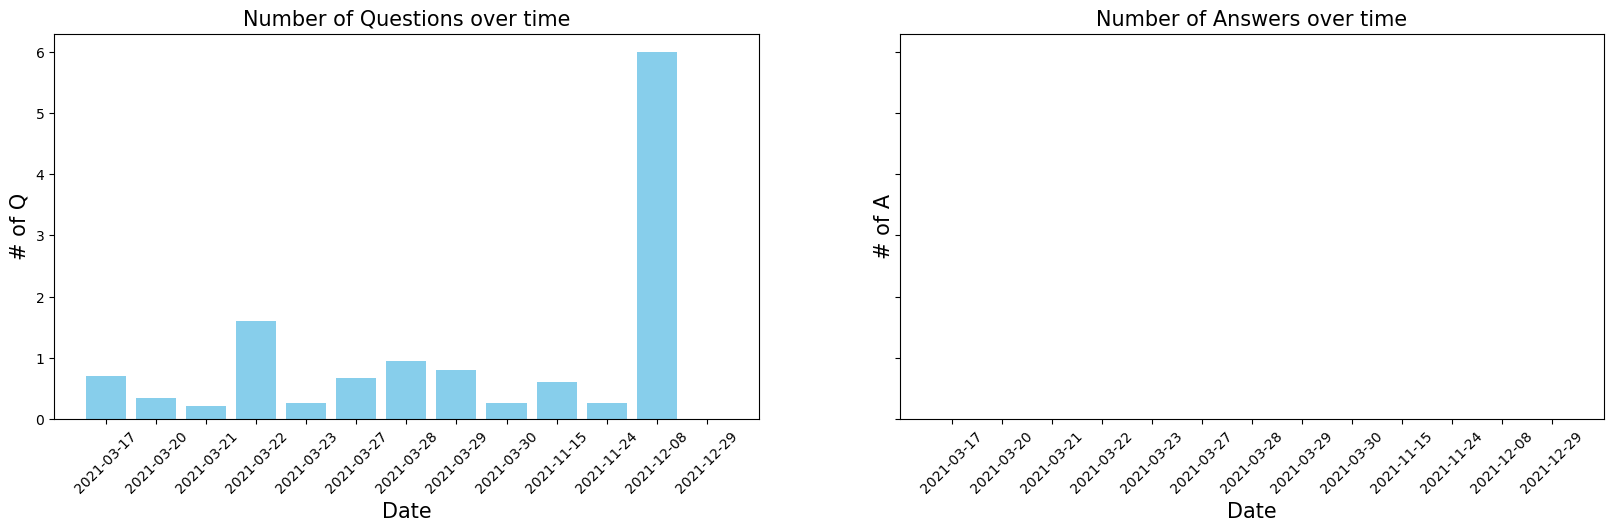

In [81]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=sharey, sharex=sharex)
# plt.xticks(rotation=45)
# major_xticks = ['2013-11-30','2014-11-30','2015-11-30','2016-11-30','2017-11-30','2018-11-30','2019-11-30','2020-11-30'
#                 ,'2021-11-30', '2022-11-30', '2023-11-30']
# yticks = np.arange(200, 2000, 400)
axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Number of Questions over time', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('# of Q', fontsize = 15)
# axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
# axs[0].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Number of Answers over time', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('# of A', fontsize = 15)
# axs[1].set_xticks(major_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(1, 2, figsize = (20, 5), sharey=False, sharex=False)
# plt.xticks(rotation=45)
major_xticks = ['2022-01-30','2022-02-28','2022-03-30','2022-04-30','2022-05-30','2022-06-30','2022-07-30','2022-08-30','2022-09-30','2022-10-30','2022-11-30','2022-12-30',
                '2023-01-30','2023-02-28','2023-03-30','2023-04-30','2023-05-30','2023-06-30','2023-07-30','2023-08-30','2023-09-30','2023-10-30','2023-11-30','2023-12-30']
axs1_xticks = ym_list
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
# yticks = np.arange(200, 2000, 400)
axs[0].bar(calc_ed_com_df['cdate']
        ,  calc_ed_com_df['Cognitive Complexity']
        ,  color = 'skyblue'
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Avg Cognitive Complexity per Day', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Avg Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(major_xticks)
# axs[0].set_yticks(yticks)
# axs[0].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)
# axs[0].yticks(yt)

axs[1].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list]
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
# axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)

plt.show();


In [ ]:
ym_list[:11]
# ym_list[12:]

In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[:11]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[12:]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
yticks = np.arange(0.5, 5, 0.5)

axs[0].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[:11]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)


axs[1].boxplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[12:]]
        # ,  edgecolor = 'black'
      ) # hist type

axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();


In [ ]:
len(np.arange(2, 13, 1))

In [ ]:
sharey = True ## 또는 sharey=False
sharex = True ## 또는 sharex=False

fig, axs = plt.subplots(2, 1, figsize = (10, 10), sharey=True, sharex=False)
# plt.xticks(rotation=45)

axs0_xticks = ym_list[:11]
axs0_xticks = np.insert(axs0_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 

axs1_xticks = ym_list[12:]
axs1_xticks = np.insert(axs1_xticks, 0, '0')  # 인덱스 2 위치에 100을 추가 
yticks = np.arange(0.5, 5, 0.5)


axs[0].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[:11]], positions=np.arange(1, 12, 1))
axs[0].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[0].set_xlabel('Date', fontsize = 15)
axs[0].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[0].set_xticks(range(len(axs0_xticks)), axs0_xticks)
axs[0].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[0].tick_params(axis='x', rotation=45)



axs[1].violinplot([calc_ed_com_box_df.loc[calc_ed_com_box_df['yyyymm']==x, 'Cognitive Complexity']  for x in ym_list[12:]], positions=np.arange(1, 12, 1))
axs[1].set_title('Cognitive Complexity per Month', fontsize = 15)
axs[1].set_xlabel('Date', fontsize = 15)
axs[1].set_ylabel('Cognitive Complexity', fontsize = 15)
axs[1].set_xticks(range(len(axs1_xticks)), axs1_xticks)
axs[1].set_yticks(yticks)
# axs[1].axvline([major_xticks[-2]], # add vertical line
#            color = 'blue',
#            linestyle = '--',
#            linewidth = 1.5)
axs[1].tick_params(axis='x', rotation=45)
plt.tight_layout()    
plt.show();
